In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import function as f

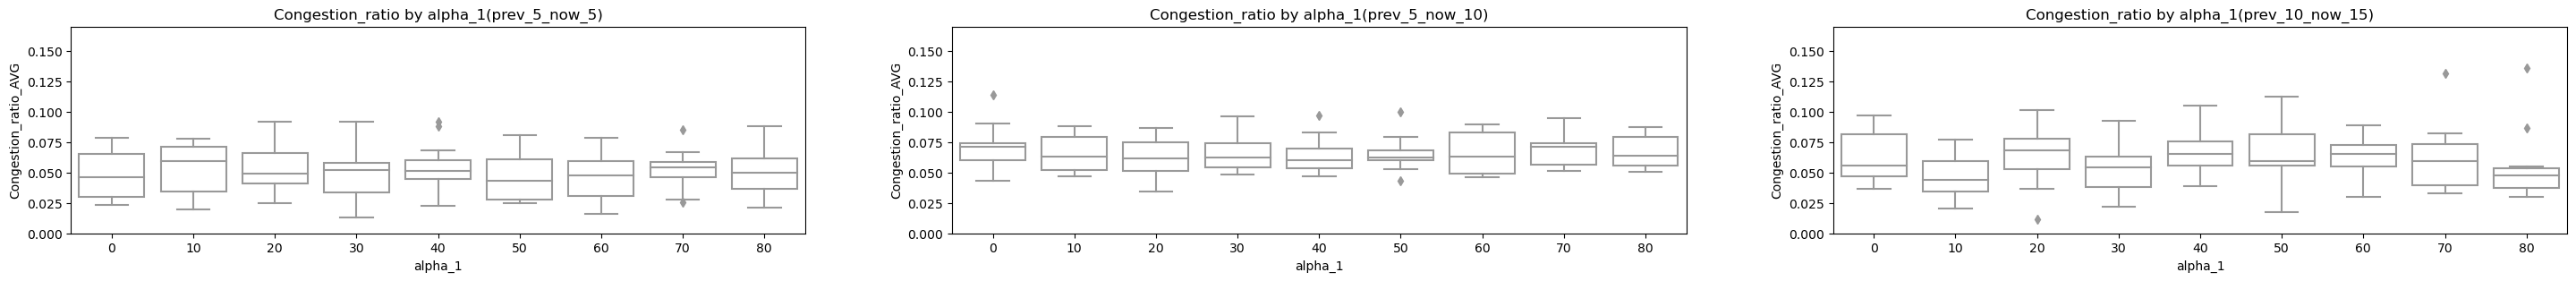

In [2]:
folder_path = 'Results'
x_col = 'alpha_1'
y_col = 'Congestion_ratio_AVG'
title = 'Congestion_ratio by alpha_1'
col_num = 3
y_lim = (0, 0.17)
fig_size = (36, 3)

dfs = f.get_dfs_by_folder(folder_path, y_col)

folder_num = len(dfs)

if folder_num % col_num == 0:
    row_num = folder_num // col_num
else:
    row_num = folder_num // col_num + 1
    
fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=fig_size)

for (key, value), ax in zip(dfs, axes.ravel()):
    subplot_title = title + '(' + key + ')'
    sns.boxplot(data=value, x=x_col, y=y_col, ax=ax, color='white')
    ax.set_title(subplot_title)
    ax.set_ylim(y_lim)
# Display the plot
plt.show()

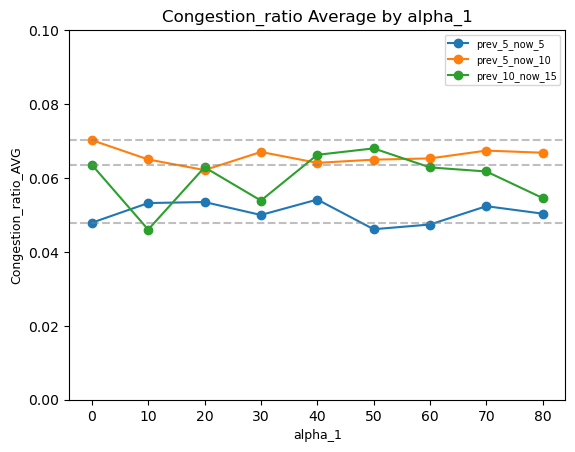

In [3]:
keys = []
for key, value in dfs:

    keys.append(key)
    # get average of group by alpha_1, alpha_2, alpha_3
    df = value.groupby(['alpha_1', 'alpha_2', 'alpha_3'])[y_col].mean().reset_index()
    
    x_value = df[x_col]
    y_value = df[y_col]
    
    # draw line plot
    plt.plot(x_value, y_value, marker='o')    
    # set y limit
    plt.ylim(0, 0.1)
    
plt.title('Congestion_ratio Average by alpha_1')
plt.xlabel(x_col, fontsize = 9)
plt.ylabel(y_col, fontsize = 9)
plt.legend(keys, fontsize = 7, loc = 'upper right')

for key, value in dfs:
    df = value.groupby(['alpha_1', 'alpha_2', 'alpha_3'])[y_col].mean().reset_index()
    y_value = df[y_col]
    plt.axhline(y=y_value[0], color='gray', linestyle='--', alpha = 0.5)
